<a href="https://colab.research.google.com/github/seungyhyunMacc/FullDuplex_LearningMachine/blob/main/Data_from_Testbed_Apply_LearningModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mp4 파일 다운로드

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import math
import struct
import matplotlib.pyplot as plt
import numpy as np

# f_tx = open("/Users/cheonseunghyeon/Downloads/log_TX",'rb')
# f_rx = open("/Users/cheonseunghyeon/Downloads/log_RX_2Ant_fix_win",'rb')

f_tx = open('log_TX','rb')
f_rx = open('log_RX_2Ant_fix_win','rb')


## TX signal
f_tx.seek(0,2)
num_byte_tx = f_tx.tell()
print(num_byte_tx)
f_tx.seek(0)
i = 0
TX_vector = []  # 송신신호
while i <  num_byte_tx:
    data_r = f_tx.read(4)
    data_i = f_tx.read(4)
    i += 8 
    unpacked_r = struct.unpack("<f", data_r)
    unpacked_i = struct.unpack("<f", data_i)
    x = unpacked_r[0] + unpacked_i[0]*1j
    TX_vector.append(x)

## RX signal    
f_rx.seek(0,2)
num_byte_rx = f_rx.tell()
print(int(num_byte_rx))
f_rx.seek(0)
i = 0
RX_vector = []  # 수신신호
while i <  num_byte_rx:
    data_r = f_rx.read(4)
    data_i = f_rx.read(4)
    i += 8 
    unpacked_r = struct.unpack("<f", data_r)
    unpacked_i = struct.unpack("<f", data_i)
    x = unpacked_r[0] + unpacked_i[0]*1j
    RX_vector.append(x)

print('complete')

50063400
49983648
complete


# Synchronize TX and RX signal vectors

11532


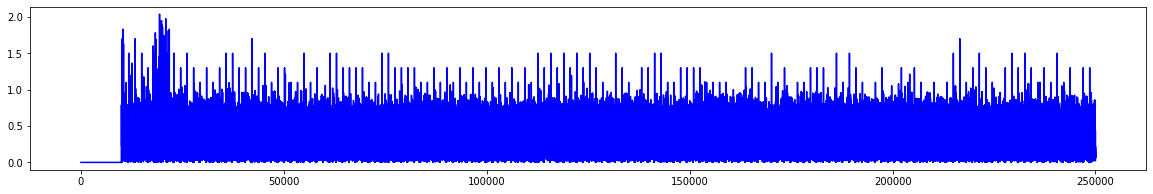

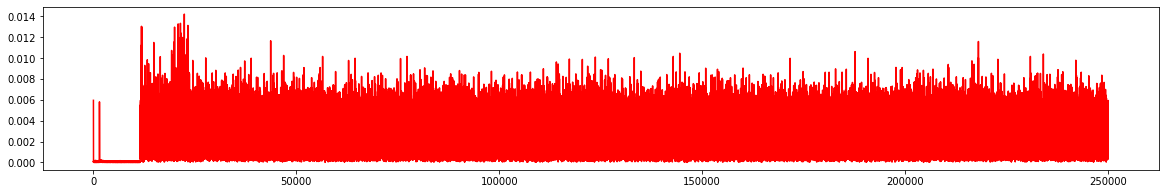

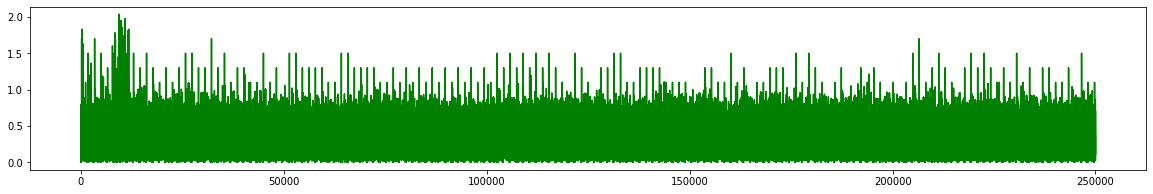

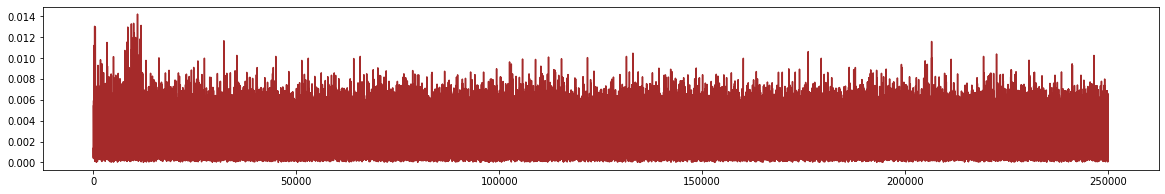

In [4]:
#start_time = 0.008
#sample_rate = 1e6 
#sample_time = 1/sample_rate

#print(sample_time)

n_smpl_out = 100000

n = 2000 
flag = 1; 
thres = 0.005 
while (n < 100000 and flag): 
    #print(n)
    if(np.absolute(RX_vector[n])>thres): 
        flag = 0 
        start_index = n 
    n += 1

start_index += 0 
print(start_index)

#start_index= 0
n_smpl_out = 100000
delay_src = 0

padding = 3

TX_vector_shift = TX_vector[10000+padding:] ## s송신신호(x값)
RX_vector_shift = RX_vector[start_index:]   ## y값

n_smpl_out = 250000
start = 50000

#plt.figure(1,figsize=(20,3)) 
#plt.plot(range(start,start+n_smpl_out),np.absolute(TX_vector[start:start+n_smpl_out]),'b') 
#plt.show()


plt.figure(1,figsize=(20,3)) 
plt.plot(range(0,n_smpl_out),np.absolute(TX_vector[0:n_smpl_out]),'b') 
plt.show()
plt.figure(1,figsize=(20,3)) 
plt.plot(range(0,n_smpl_out),np.absolute(RX_vector[0:n_smpl_out]),'r') 
plt.show()
plt.figure(1,figsize=(20,3)) 
plt.plot(range(0,n_smpl_out),np.absolute(TX_vector_shift[0:n_smpl_out]),'g') 
plt.show()
plt.figure(1,figsize=(20,3)) 
plt.plot(range(0,n_smpl_out),np.absolute(RX_vector_shift[0:n_smpl_out]),'brown') 
plt.show()



In [5]:
import numpy as np
import tensorflow as tf

In [6]:
length_data = 100000
L = 6   
var_S = 5e-1
var_N = 1e-5

P_max = 5
P_min = 1

s=TX_vector_shift
y=RX_vector_shift



In [8]:
x_data = np.zeros([length_data - L + 1, L],dtype = 'complex')   ## feature data
y_data = np.zeros([length_data - L + 1, 1],dtype = 'complex')   ## label 

### mapping
for i in range(length_data - L + 1):
    y_data[i] = y[i + L -1] ## y값을 y_data에 매핑 
    x_data[i] = s[i : i + L]  ## s값(송신신호)를 x_data에 매핑

x_data2 = x_data

for p in [a for a in range(P_min,P_max+1) if a%2==1]:
  for q in range(p+1):
    if p == 1 and q == 0:
      x_data = np.power(x_data2, q)*np.power(x_data2.conjugate(), p-q)
    else:
      math_sentence_answer = np.power(x_data2, q)*np.power(x_data2.conjugate(), p-q)
      x_data = np.concatenate((x_data, math_sentence_answer), axis=1)

train_data = np.concatenate((x_data.real, x_data.imag), axis=1)
target_data = np.concatenate((y_data.real, y_data.imag), axis=1)


print('x데이터')
print(train_data.shape)
print('\n')

print('y데이터')
print(target_data.shape)
print('\n')


x데이터
(99995, 144)


y데이터
(99995, 2)




In [10]:
##################################################    
# Test Data Set
###################################################
x_data_test = np.zeros([length_data - L+ 1, L],dtype = 'complex')
y_data_test = np.zeros([length_data - L+ 1, 1],dtype = 'complex')
    
for i in range(length_data- L + 1):
    y_data_test[i] = y[i + L -1]
    x_data_test[i] = s[i : i + L]   

x_data_test2 = x_data_test

for p in [a for a in range(P_min,P_max+1) if a%2==1]:
  for q in range(p+1):
    if p == 1 and q == 0:
      x_data_test = np.power(x_data_test2, q)*np.power(x_data_test2.conjugate(), p-q)
    else:
      math_sentence_answer = np.power(x_data_test2, q)*np.power(x_data_test2.conjugate(), p-q)
      x_data_test = np.concatenate((x_data_test, math_sentence_answer), axis=1)

test_data = np.concatenate((x_data_test.real, x_data_test.imag), axis=1)
target_test_data = np.concatenate((y_data_test.real, y_data_test.imag), axis=1)


print('x데이터')
print(test_data.shape)
print('\n')

print('y데이터')
print(target_test_data.shape)
print('\n')





x데이터
(99995, 144)


y데이터
(99995, 2)




In [11]:
tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(units=2, input_dim=144))  # input_dim=9 gives multi-variable regression
tf.model.add(tf.keras.layers.Activation('linear'))  # this line can be omitted, as linear activation is default

tf.model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3))
tf.model.summary()
history = tf.model.fit(train_data, target_data, epochs=200)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 290       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 290
Trainable params: 290
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
3125/3125 [==============================] - 5s 1ms/step - loss: 0.0332
Epoch 2/200
3125/3125 [==============================] - 5s 2ms/step - loss: 0.0148
Epoch 3/200
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0092
Epoch 4/200
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0067
Epoch 5/200
3125/3125 [==============================] - 4s 1ms/step - loss: 0.0053
Epoch 6/200
3125/3125 [===========

In [12]:
score = tf.model.evaluate(test_data, target_test_data, verbose=1)
print(score) 

3125/3125 [==============================] - 4s 1ms/step - loss: 0.0874
0.08742953091859818


# Calculate filter parameters

In [ ]:
n_smpl_out = 1000
NN = 6 # size of RW matrix

length_corr = len(RX_vector) - NN
len(RX_vector)

R_W = np.zeros([NN,NN],dtype=complex)

for n in range(NN):
    for m in range(NN):
        i = int(np.abs(n-m))
        R_W[n,m] = np.mean(np.multiply(TX_vector_shift[0:n_smpl_out],np.conj(TX_vector_shift[i:n_smpl_out+i])))

#print(R_W)
R_SW = np.zeros(NN,dtype=complex)
for n in range(NN):
    R_SW[n] = np.mean(np.multiply(TX_vector_shift[0:n_smpl_out],np.conj(RX_vector_shift[n:n_smpl_out+n])))#
    
AA = np.matmul(np.linalg.inv(R_W),np.conj(R_SW))   
#AA = np.matmul(np.linalg.inv(R_W),R_W)    
print(AA)
#AA_1 = AA
    


[ 0.00174793+0.00777883j -0.0027842 -0.01526311j  0.01349517+0.16661966j
  0.00285498+0.03478415j  0.00108425-0.01411682j -0.008096  +0.00596483j]


# Find filter every n_smple_out samples

In [ ]:
n_smpl_out = 1600
NN = 6 # size of RW matrix


N_total = min(len(TX_vector_shift),len(RX_vector_shift))
N_period = math.floor(N_total/n_smpl_out)
AA = np.zeros((N_period,NN),dtype='complex')

for l in range(N_period):
    R_W = np.zeros([NN,NN],dtype=complex)

    for n in range(NN):
        for m in range(NN):
            if (n < m or (n == 0 and m ==0) ):
                i = int(np.abs(n-m))
                R_W[n,m] = np.mean(np.multiply(TX_vector_shift[l*n_smpl_out:(l+1)*n_smpl_out-NN+1],np.conj(TX_vector_shift[l*n_smpl_out+i:(l+1)*n_smpl_out+i-NN+1])))
            elif(n == m):
                R_W[n,m] = R_W[0,0]
            else:
                R_W[n,m] = R_W[m,n] 

    #print(R_W)
    R_SW = np.zeros(NN,dtype=complex)
    for n in range(NN):
        R_SW[n] = np.mean(np.multiply(TX_vector_shift[l*n_smpl_out:(l+1)*n_smpl_out-NN+1],np.conj(RX_vector_shift[l*n_smpl_out+n:(l+1)*n_smpl_out+n-NN+1])))#

    AA[l] = np.matmul(np.linalg.inv(R_W),np.conj(R_SW))   
        
print('complete')

complete


# check difference of average filter parameters from other filter parameters 

[-0.00118024+0.00719314j  0.00084924-0.01468441j  0.01110723+0.16120071j
  0.00810968+0.03363871j -0.00325872-0.01324443j -0.00047161+0.00501139j]


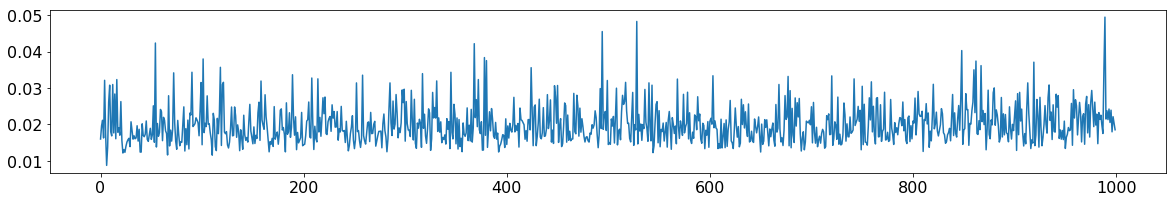

3367

In [ ]:
AA_avg = np.zeros(NN,dtype='complex')
AA_T = AA.transpose()
for k in range(NN):
    AA_avg[k] = np.average(AA_T[k])
    
print(AA_avg)
N_n = 1000
plt.figure(1,figsize=(20,3))
plt.plot(range(N_n),[np.sum(abs(AA[n]-AA_avg)) for n in range(N_n)])
plt.show()
N_period

In [ ]:
temp = np.zeros(NN,dtype='complex')
for k in range(N_period):
    temp = temp + (AA[k]-AA_avg)*np.conj(AA[k]-AA_avg)
    #temp = temp + (AA[k])*np.conj(AA[k]) ## energy
temp_avg = temp/N_period
variance_AA = np.sum(np.absolute(temp_avg))
print(variance_AA)


0.0016349453360485274


2.0

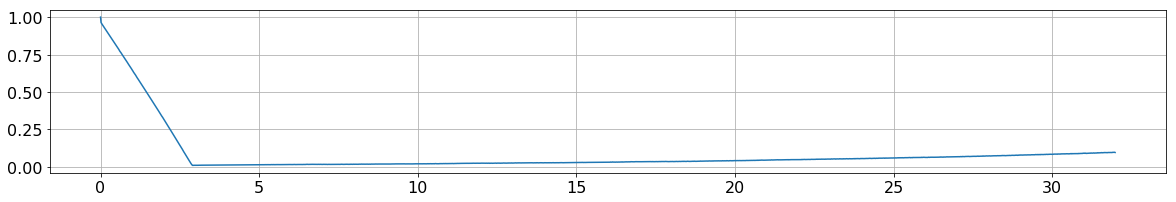

complete


In [ ]:

Tau = 2000
sampling_rate =100e3
Auto_cor = np.zeros(Tau, dtype='float')
for l in range(Tau):
    temp = np.zeros(NN,dtype='complex')
    for k in range(N_period-l):
        temp = temp + (AA[k]-AA_avg)*np.conj(AA[k+l]-AA_avg)
        #temp = temp + (AA[k])*np.conj(AA[k+l])
    temp_avg = temp/(N_period-l)
    Auto_cor[l] = np.sum(np.absolute(temp_avg))/variance_AA
    #Auto_cor[l] = np.sum(np.absolute(temp_avg))

plt.figure(1,figsize=(20,3)) 
plt.plot(1/sampling_rate*n_smpl_out*np.array(range(Tau)),Auto_cor)
#plt.plot(np.array(range(Tau)),Auto_cor)
plt.grid(True)
plt.show()
print('complete')




In [ ]:
Auto_cor[0]


1.0

In [ ]:
import matplotlib
plt.figure(1,figsize=(8,6)) 
Tau = 500
matplotlib.rcParams.update({'font.size':16})
plt.plot(1/sampling_rate*n_smpl_out*np.array(range(Tau)),Auto_cor_circl_fix[:Tau],'r',label='Circulator | residual | fixed')
plt.plot(1/sampling_rate*n_smpl_out*np.array(range(Tau)),Auto_cor_circl_mov[:Tau],'b',label='Circulator | residual  | moving')
plt.plot(1/sampling_rate*n_smpl_out*np.array(range(Tau)),Auto_cor_2Ant_fix[:Tau], 'brown',label='Two-ant   | residual  | fixed')
plt.plot(1/sampling_rate*n_smpl_out*np.array(range(Tau)),Auto_cor_2Ant_mov[:Tau],'g',label='Two-ant   | residual  | moving')
plt.grid(True)
plt.xlabel('time (sec)')
plt.ylabel('Autocovariance')
#plt.title('The moving average power of residual signals')
plt.legend()
plt.savefig('Autocovariance.png')
plt.show()
print('complete')


#Auto_cov_2Ant_fix = Auto_cor_2Ant_fix 
#Auto_cov_circl_mov = Auto_cor_circl_mov 
#Auto_cov_circl_fix = Auto_cor_circl_fix 
#Auto_cov_2Ant_mov = Auto_cor_2Ant_mov 





NameError: name 'Auto_cor_circl_fix' is not defined

<Figure size 576x432 with 0 Axes>

In [ ]:
len(Auto_cor_circl_fix)

1700

In [ ]:
AA

array([ 0.02685085+0.08623248j, -0.06504251-0.15118482j,
        0.06503819+0.28930845j, -0.09444845-0.41903694j,
        0.06195699+0.5964787j ,  0.00969778-0.96614317j,
       -1.57615233+4.90852843j, -0.34176192-0.15815951j,
        0.3493831 +0.23926862j, -0.39994821-0.24897044j,
        0.17722415+0.13670603j, -0.27174407-0.13603689j,
        0.02660074+0.02784048j, -0.15419339-0.0618807j ,
       -0.01338482-0.0135679j ])

In [ ]:
print(AA[0])


array([-0.00033217-0.00164008j, -0.00088468+0.00655548j,
       -0.01989359+0.07304755j,  0.00333225-0.00239414j,
       -0.00288606+0.00023986j, -0.0014335 -0.00151712j])

In [ ]:
Q1 = []
AA = range(10)
print(Q1)
print(AA)



[]
range(0, 10)


In [ ]:
Q1[:] = AA
print


NameError: name 'Q1' is not defined

[0.+0.j 0.+0.j]


In [ ]:
N_points = 5
N_output = 13
N_symbols = 100

queue1 = []
BB = [i+1 for i in range(N_symbols)]
#print(id(queue1))
queue1.extend(BB)
print(queue1)
#print(id(queue1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
AA = [1 for i in range(N_points)]
np.convolve(AA,queue1)

#print(id(queue1))

array([  1,   3,   6,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,
        60,  65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120,
       125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185,
       190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250,
       255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315,
       320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380,
       385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445,
       450, 455, 460, 465, 470, 475, 480, 485, 490, 394, 297, 199, 100])

In [ ]:
temp_1 = np.convolve(AA,queue1[:N_output])
out0 = temp_1[:N_output] 
del queue1[:N_output-(N_points-1)]

print(out0)
print(queue1)





[ 1  3  6 10 15 20 25 30 35 40 45 50 55]
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [ ]:
temp_1 = np.convolve(AA,queue1[:N_output+N_points-1])
out0 = temp_1[N_points-1:N_output+N_points-1] 
del queue1[:N_output] 

print(out0)
print(queue1)


[ 60  65  70  75  80  85  90  95 100 105 110 115 120]
[23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


2.5

[]